In [1]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd

In [18]:
# Define the instruments to download. We would like to see Apple, Microsoft and the S&P500 index.
tickers = ['AAPL', 'MSFT', 'SPY']

# Define which online source one should use
data_source = 'google'

# We would like all available data from 01/01/2000 until 9/30/2017.
start_date = '2016-10-07'
end_date = '2017-09-30'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
panel_data = data.DataReader(tickers, data_source, start_date, end_date)

# Getting just the adjusted closing prices. This will return a Pandas DataFrame
# The index in this DataFrame is the major index of the panel_data.
close = panel_data.loc['Close']

# Getting all weekdays bewwen 10/07/2016 and 09/30/2017
all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')

# How do we align the existing prices in adj_close with our new set of dates?
# All we need to do is reindex close using all_weekdays as the new index
close = close.reindex(all_weekdays)

close.head(10)


,AAPL,MSFT,SPY
2016-10-07,114.06,57.80,215.04
2016-10-10,116.05,58.04,216.16
2016-10-11,116.30,57.19,213.43
2016-10-12,117.34,57.11,213.71
2016-10-13,116.98,56.92,213.01
2016-10-14,117.63,57.42,213.12
2016-10-17,117.55,57.22,212.38
2016-10-18,117.47,57.66,213.71
2016-10-19,117.12,57.53,214.28
2016-10-20,117.06,57.25,213.88


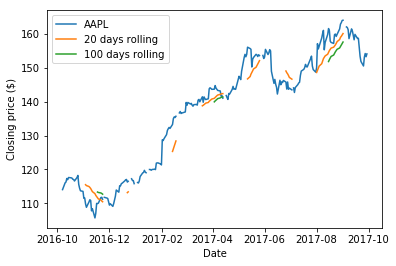

In [29]:
aapl = close.loc[:, 'AAPL']

# Calculate the 20 and 100 days moving averages of the closing prices
short_rolling_aapl = aapl.rolling(window=20).mean()
long_rolling_aapl = aapl.rolling(window=30).mean()

# Plot everything by leveraging the very powerful matplotlib package
_ = plt.plot(aapl, label='AAPL')
_ = plt.plot(short_rolling_aapl, label='20 days rolling')
_ = plt.plot(long_rolling_aapl, label='100 days rolling')
_ = plt.xlabel('Date')
_ = plt.ylabel('Closing price ($)')
_ = plt.legend()
_ = plt.show()